<a href="https://colab.research.google.com/github/Vaish-2211/Peril-Prediction/blob/main/endang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,LogisticRegression
import re
import json
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('animal.csv')
df.head()

,Animal,Scientific Name,Class,2000,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
0,Mountain Gorilla,Gorilla beringei beringei,beringei,359,400,469,386,412,320,450,650,880,920,1063
1,Irrwwaddy dolphin,Orcaella brevirostris,Mammalia,200,163,186,143,92,78,53,64,58,76,92
2,Red Panda,Ailurus fulgens,Mammalia,15000,14200,14325,13216,12500,11586,10985,11000,10846,10250,8000
3,Asian Elephant,Elephas maximus,Mammalia,30771,27312,27670,26450,27486,28912,29336,30000,29459,28674,27312
4,Giant Panda,Ailuropoda melanoleuca,Mammalia,698,577,450,568,856,920,1100,1350,1420,1596,1864


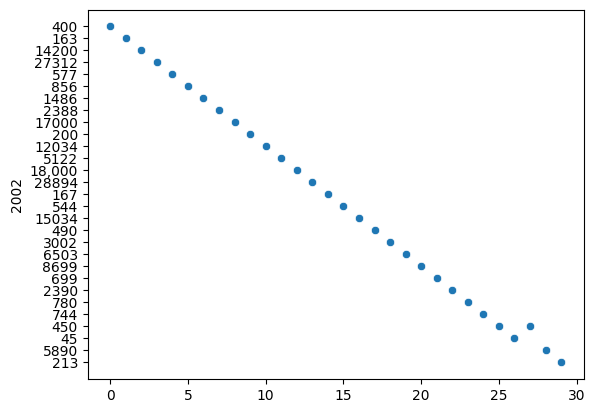

In [ ]:
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt

# Load data from a CSV file into a Pandas DataFrame:
dataFrame = pd.read_csv("animal.csv")


sb.scatterplot(dataFrame['2002'])


plt.show()

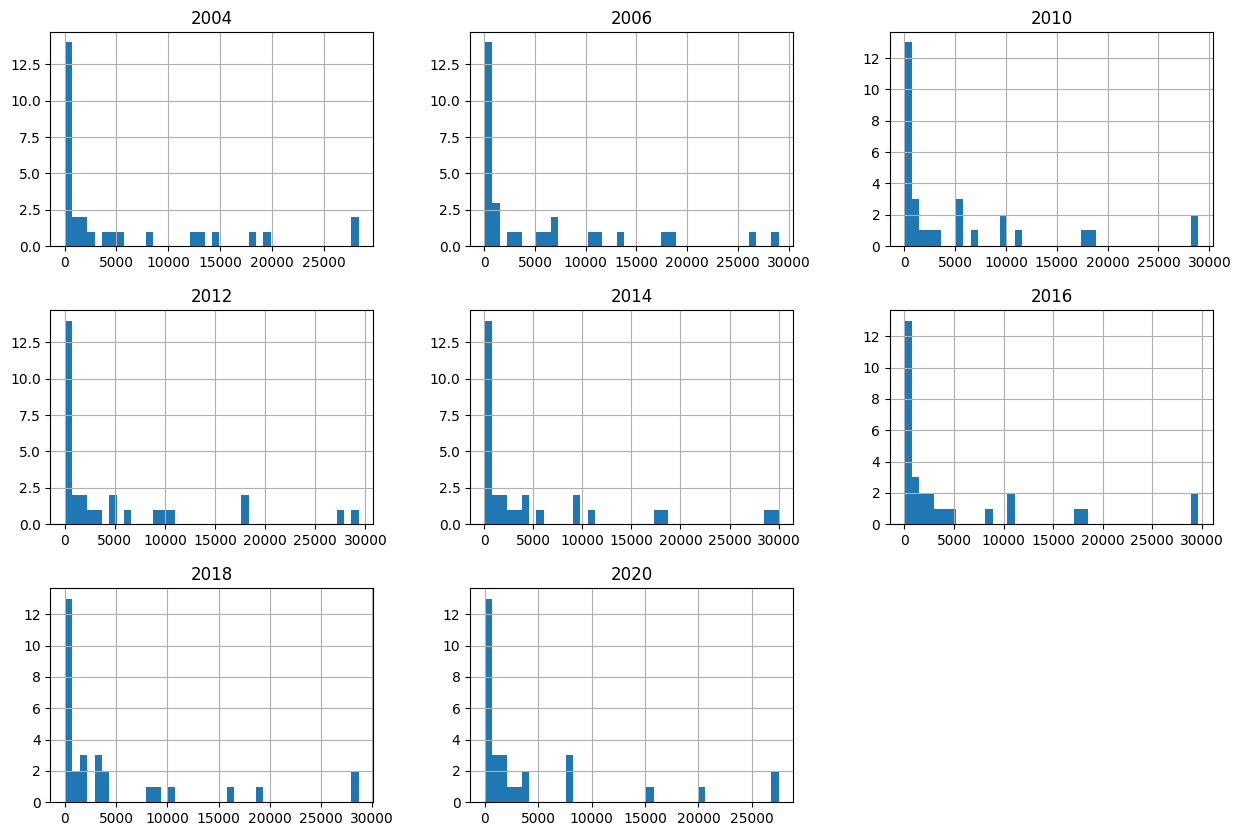

In [ ]:
df.hist(bins=40, figsize=(15,10))
plt.show()

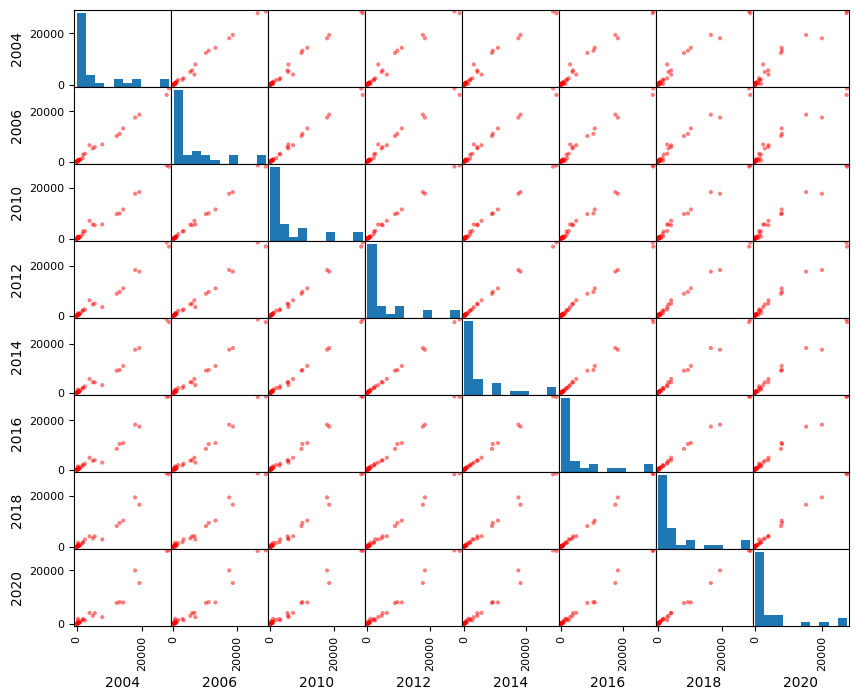

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ['2000','2002','2004','2006','2008','2010','2012','2014','2016','2018','2020']
scatter_matrix(df[attributes], figsize=(10,8),color='red')
plt.show()


In [ ]:
df.corr()

,2004,2006,2010,2012,2014,2016,2018,2020
2004,1.000000,0.994944,0.989483,0.984499,0.983524,0.983454,0.980533,0.970958
2006,0.994944,1.000000,0.996716,0.991360,0.990147,0.989035,0.986142,0.978090
2010,0.989483,0.996716,1.000000,0.997692,0.996632,0.994269,0.992205,0.986360
2012,0.984499,0.991360,0.997692,1.000000,0.999236,0.997946,0.997087,0.992908
2014,0.983524,0.990147,0.996632,0.999236,1.000000,0.998763,0.997174,0.992431
2016,0.983454,0.989035,0.994269,0.997946,0.998763,1.000000,0.998741,0.994605
2018,0.980533,0.986142,0.992205,0.997087,0.997174,0.998741,1.000000,0.997459
2020,0.970958,0.978090,0.986360,0.992908,0.992431,0.994605,0.997459,1.000000


<Axes: >

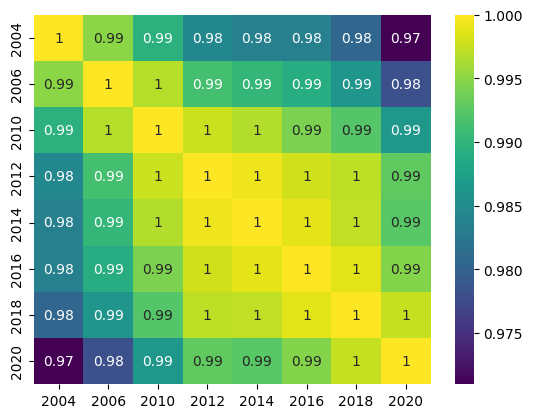

In [ ]:
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')

In [ ]:
bd=df.loc[df['Animal']=='Mountain Gorilla']
bd.drop(['Animal','Scientific Name','Class'],axis=1,inplace=True)
bd = bd.T
bd.head()

,0
2000,359
2002,400
2004,469
2006,386
2008,412


In [ ]:
bd.dropna(inplace=True)
bd=bd.reset_index().rename(columns={0:'population','index':'year'})
bd.head()

,year,population
0,2000,359
1,2002,400
2,2004,469
3,2006,386
4,2008,412


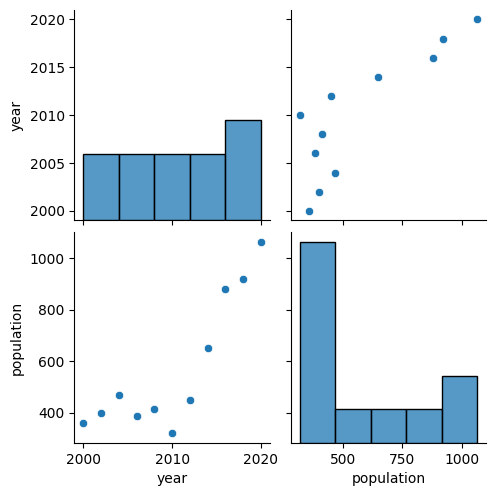

In [ ]:
bd = bd.astype(int)
sns.pairplot(bd)

In [ ]:
x=bd['year']
y=bd['population']
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size =0.2)
# print the data
x_train

4    2008
1    2002
7    2014
9    2018
6    2012
0    2000
8    2016
5    2010
Name: year, dtype: int64

In [ ]:
y_test

10    1063
3      386
2      469
Name: population, dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x_train.values.reshape(-1,1),y_train)
y_pred=clf.predict((x_train).values.reshape(-1,1))
clf.score(x_train.values.reshape(-1,1),y_train)

0.6362381168591179

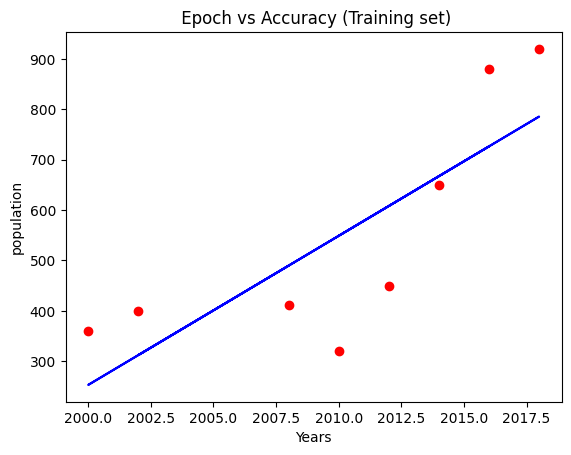

In [ ]:
import matplotlib.pyplot as plot
plot.scatter(x_train, y_train, color = 'red')
plot.plot(x_train,y_pred, color = 'blue')
plot.title(' Epoch vs Accuracy (Training set)')
plot.xlabel('Years')
plot.ylabel('population')
plot.show()

In [ ]:
clf.predict((x_test).values.reshape(-1,1))

array([844.91666667, 430.45833333, 371.25      ])

In [ ]:
clf.score(x_test.values.reshape(-1,1),y_test)

0.7832956766403428

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train.values.reshape(-1,1), y_train)
tree_reg.score(x_test.values.reshape(-1,1),y_test)

0.9050698364655634

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(x_train.values.reshape(-1,1), y_train)
forest_reg.score(x_test.values.reshape(-1,1),y_test)

0.8339232984619598

In [ ]:
x = bd.iloc[:, 0].values.reshape(-1, 1)
y = bd.iloc[:, 1].values.reshape(-1, 1)
model = LinearRegression().fit(x, y)
y_pred = model.predict([[2030]])
y_pred

array([[1246.18181818]])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
logmodel = LogisticRegression()
logmodel.fit(x_train.values.reshape(-1,1),y_train.astype(int))

predictions = logmodel.predict(x_test.values.reshape(-1,1))
#print(classification_report(y_test, predictions))
#print(confusion_matrix(y_test, predictions))
logmodel.score(x_train.values.reshape(-1,1),y_train.astype(int))

0.125

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(x_train.values.reshape(-1,1), y_train.astype(int))
y_pred = clf.predict((x_test).values.reshape(-1,1))
from sklearn import metrics
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred.astype(int)))
clf.score(x_train.values.reshape(-1,1),y_train.astype(int))

1.0

In [ ]:
def main():
    animal = input("Please input the Animal name: ").lower()
    year = int(input("Please input the year to predict: "))
    df = pd.read_csv('animal.csv')
    lists, df = Animal_list_gen(df)
    if animal in lists:
        df = selecting_animal(df, animal)
        model = prediction_model(df)
        result = prediction(model,year)
        print(f"\n Result: {animal.upper()} population in {year} will be {result:,d}")
    else:
        print('kindly check Animal name spelling from Animal_list.json')

if __name__ == "__main__":
    main()

In [ ]:
def Animal_list_gen(df):
    df.rename(columns={'Animal':'animal_name'},inplace=True)
    df['animal_name'] = df['animal_name'].apply(lambda row: row.lower())
    lists = df['animal_name'].unique().tolist()
    with open('animal_list.json','w', encoding='utf-8') as f:
        json.dump(lists, f, ensure_ascii=False,indent=4)
    return lists, df

In [ ]:
def selecting_animal(df,animal):
    df = df.loc[df['animal_name']==animal]
    df.drop(['animal_name','Scientific Name','Class'],axis=1,inplace=True)
    df = df.T
    df.dropna(inplace=True)
    df = df.reset_index()
    return df
def prediction_model(df):
    x = df.iloc[:, 0].values.reshape(-1,1)
    y = df.iloc[:, 1].values.reshape(-1,1)
    st=split(x,y)
    model = LinearRegression().fit(x,y)
    print(model.intercept_)
    print(model.coef_)
    return model
def prediction(model, year):
    return int(model.coef_[0][0] * year + model.intercept_[0])